In [1]:
import matplotlib.pyplot as plt
import sys
import pandas as pd
import networkx as nx
from operator import itemgetter
from itertools import combinations
import re

In [2]:
file = open('harry_potter.txt','rb')

In [3]:
text = file.read().decode(encoding='utf-8',errors='replace')

text = text.replace('\n',' ')
text = text.replace('\'','')
text = text.replace('-',' ')
text = text.lower()

def normalcharacters(x):
    for i in x:
        if(i<'a' or x>'z'):
            return False
    return True

text = ' '.join([x for x in text.split() if(normalcharacters(x))])
print(text)

harry potter and the sorcerers stone chapter one the boy who lived and of number privet were proud to say that they were perfectly thank you very they were the last people youd expect to be involved in anything strange or because they just didnt hold with such dursley was the director of a firm called which made he was a beefy man with hardly any although he did have a very large dursley was thin and blonde and had nearly twice the usual amount of which came in very useful as she spent so much of her time craning over garden spying on the the dursleys had a small son called dudley and in their opinion there was no finer boy the dursleys had everything they but they also had a and their greatest fear was that somebody would discover they didnt think they could bear it if anyone found out about the potter was dursleys but they hadnt met for several in dursley pretended she didnt have a because her sister and her good for nothing husband were as undursleyish as it was possible to the durs

In [4]:
words_list = text.split()

In [5]:
len(words_list)

63388

In [6]:
characters = ["Harry", "Hermione", "Ron", "Dursleys", "Dumbledore", "Voldemort", "Hagrid", "Draco", "McGonagall", "Snape", "Quirrell", "Neville", "Vernon", "Petunia", "Dudley", "Hedwig", "Ollivander", "Fred","George", "James","Lily","Molly","Percy","Filch","Nicolas","Oliver","Lee","Seamus","Charlie","Vincent","Gregory","Hooch","Fang","Fluffy","Griphook","Malkin","Cornelius","Lavender","Pomfrey","Katie","Angelina","Marcus","Irma","Alicia","Flitwick","Sprout","Binns","Piers","Augusta","Trevor","Ginny","Gellert","Tom","Sirius"]

In [7]:
characters = [x.lower() for x in characters]

In [8]:
print(characters)
len(characters)

['harry', 'hermione', 'ron', 'dursleys', 'dumbledore', 'voldemort', 'hagrid', 'draco', 'mcgonagall', 'snape', 'quirrell', 'neville', 'vernon', 'petunia', 'dudley', 'hedwig', 'ollivander', 'fred', 'george', 'james', 'lily', 'molly', 'percy', 'filch', 'nicolas', 'oliver', 'lee', 'seamus', 'charlie', 'vincent', 'gregory', 'hooch', 'fang', 'fluffy', 'griphook', 'malkin', 'cornelius', 'lavender', 'pomfrey', 'katie', 'angelina', 'marcus', 'irma', 'alicia', 'flitwick', 'sprout', 'binns', 'piers', 'augusta', 'trevor', 'ginny', 'gellert', 'tom', 'sirius']


54

In [9]:
links = []
window = 5
window_parts = []
for k in range(0,len(words_list),window):
    text_current = words_list[k:k+window]
    window_parts.append(' '.join(text_current))

print(window_parts)
for i in range(0,len(characters)):
    for j in range(i+1,len(characters)):
        count = 0
        for part in window_parts:
            if (len(re.findall(characters[i],part)) > 0) and (len(re.findall(characters[j],part)) > 0):
                count += 1
        edge = []
        edge.append(characters[i])
        edge.append(characters[j])
        edge.append(count)
        links.append(edge)        

['harry potter and the sorcerers', 'stone chapter one the boy', 'who lived and of number', 'privet were proud to say', 'that they were perfectly thank', 'you very they were the', 'last people youd expect to', 'be involved in anything strange', 'or because they just didnt', 'hold with such dursley was', 'the director of a firm', 'called which made he was', 'a beefy man with hardly', 'any although he did have', 'a very large dursley was', 'thin and blonde and had', 'nearly twice the usual amount', 'of which came in very', 'useful as she spent so', 'much of her time craning', 'over garden spying on the', 'the dursleys had a small', 'son called dudley and in', 'their opinion there was no', 'finer boy the dursleys had', 'everything they but they also', 'had a and their greatest', 'fear was that somebody would', 'discover they didnt think they', 'could bear it if anyone', 'found out about the potter', 'was dursleys but they hadnt', 'met for several in dursley', 'pretended she didnt have a', 

In [10]:
mygraph = nx.Graph()
mygraph.add_nodes_from(characters)
print(links)
for i in links:
    if(i[2]!=0):
        mygraph.add_edge(i[0],i[1],weight=int(i[2]))
print(nx.info(mygraph))

[['harry', 'hermione', 18], ['harry', 'ron', 45], ['harry', 'dursleys', 2], ['harry', 'dumbledore', 6], ['harry', 'voldemort', 1], ['harry', 'hagrid', 22], ['harry', 'draco', 1], ['harry', 'mcgonagall', 4], ['harry', 'snape', 7], ['harry', 'quirrell', 8], ['harry', 'neville', 5], ['harry', 'vernon', 7], ['harry', 'petunia', 0], ['harry', 'dudley', 8], ['harry', 'hedwig', 1], ['harry', 'ollivander', 2], ['harry', 'fred', 3], ['harry', 'george', 2], ['harry', 'james', 0], ['harry', 'lily', 0], ['harry', 'molly', 0], ['harry', 'percy', 0], ['harry', 'filch', 1], ['harry', 'nicolas', 0], ['harry', 'oliver', 0], ['harry', 'lee', 2], ['harry', 'seamus', 2], ['harry', 'charlie', 1], ['harry', 'vincent', 0], ['harry', 'gregory', 0], ['harry', 'hooch', 0], ['harry', 'fang', 1], ['harry', 'fluffy', 0], ['harry', 'griphook', 0], ['harry', 'malkin', 2], ['harry', 'cornelius', 0], ['harry', 'lavender', 0], ['harry', 'pomfrey', 0], ['harry', 'katie', 0], ['harry', 'angelina', 1], ['harry', 'marcus',

Question A


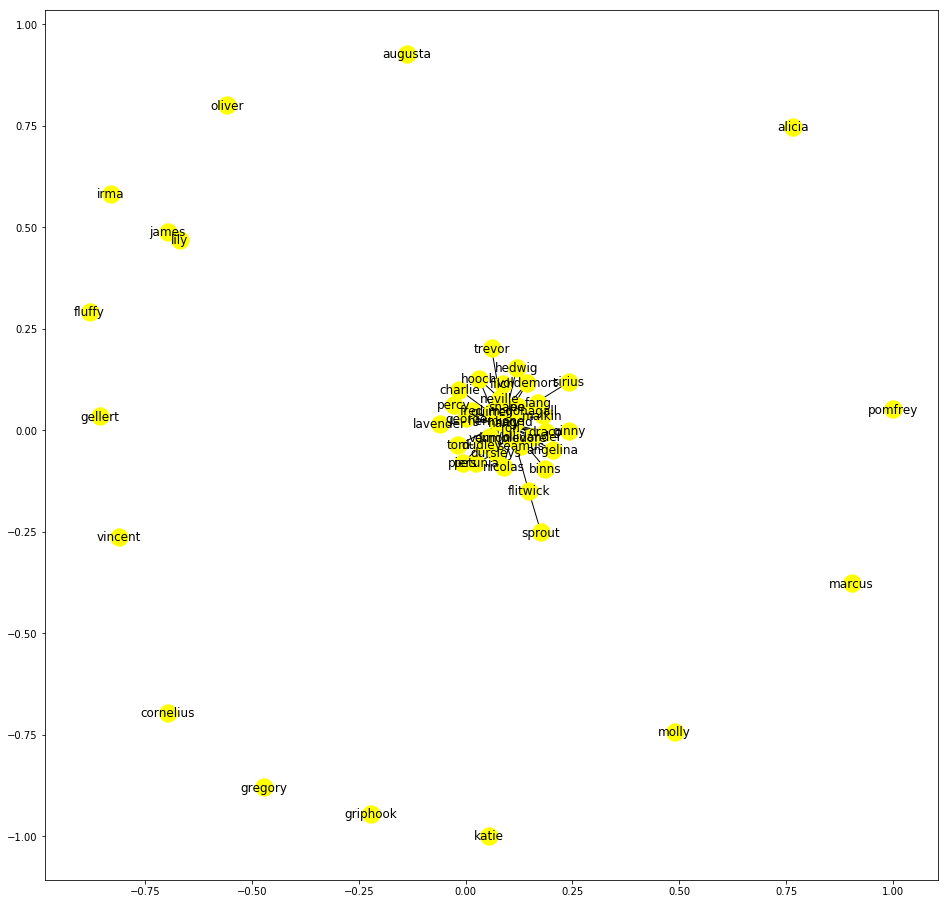

In [14]:
print('Question A')
plt.figure(3,figsize=(16,16)) 
nx.draw_networkx(mygraph,node_color='yellow',with_labels=True)
plt.show()

In [ ]:
print('Question B')
print(mygraph.nodes)
print(mygraph.edges)
print(nx.get_edge_attributes(mygraph,'weight'))

In [ ]:
print('Question C')

print('Degree Centrality')
print(nx.degree_centrality(mygraph))
print()

print('Closeness Centrality')
print(nx.closeness_centrality(mygraph))
print()

print('Betweenness Centrality')
print(nx.betweenness_centrality(mygraph))
print()

print('Eigen Vector Centrality')
print(nx.eigenvector_centrality(mygraph))
print()

In [ ]:
print('Question D')
print('Pearson Correlation coefficient')
print(nx.degree_pearson_correlation_coefficient(mygraph))

cc=nx.closeness_centrality(mygraph)
dc=nx.degree_centrality(mygraph)
bc = nx.betweenness_centrality(mygraph)
ec = nx.eigenvector_centrality(mygraph,max_iter=1000)
sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]

from scipy.stats.stats import pearsonr
r1 = pearsonr(deg_data,betw_data)
s = "\n Pearson Correlation Coeff deg and betweenness: " + repr(r1)
print(s)
r2 = pearsonr(deg_data,close_data)
s = "\n Pearson Correlation Coeff deg and closeness: " + repr(r2)
print(s)
r3 = pearsonr(betw_data,close_data)
s = "\n Pearson Correlation Coeff betweennness and closeness: " + repr(r3)
print(s)
r4 = pearsonr(betw_data,eig_data)
s = "\n Pearson Correlation Coeff betweennness and eigenvector : " + repr(r4)
print(s)

In [ ]:
print('Question E')
import collections

def degree_histogram(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    # draw graph in inset
    plt.axes([0.4, 0.4, 0.5, 0.5])
    Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
    pos = nx.spring_layout(G)
    plt.axis('off')
    #nx.draw_networkx_nodes(G, pos, node_size=20)
    #nx.draw_networkx_edges(G, pos, alpha=0.4)

    plt.show()

    
print('Degree Distribution Histogram')
degree_histogram(mygraph)

degree_sequence = sorted([d for n, d in mygraph.degree()], reverse=True)  # degree sequence
print(degree_sequence)
print('Log Log Plot')
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

In [ ]:
print('Question F')
print('degree assortativity')
print(nx.degree_assortativity_coefficient(mygraph))

In [ ]:
print('Question G')
print('The shortest paths between all the pairs of nodes')
pair=nx.all_pairs_shortest_path(mygraph)
for i in pair:
    print(i)

In [ ]:
print('Question H')
print('Diameter of the graph')
try:
    print(nx.diameter(mygraph))
except:
    print('Diameter = infinity as not graph is not connected')

In [ ]:
print('Question I')
print('Network density')
print(nx.density(mygraph))

In [ ]:
print('Question J')
a = nx.edge_betweenness_centrality(mygraph)
sorted_a = sorted(a.items(), key=lambda i: i[1], reverse=True)[:5] 

for i in sorted_a:
    print(i)

In [ ]:
print('Question K')
print('the top 3 nodes ( in terms of degree centrality), draw the ego network and list their alters\n')
a = nx.degree_centrality(mygraph)
import operator
sorted_by_value = sorted(a.items(), key=lambda kv: kv[1],reverse=True)
print('Top three nodes')
print(sorted_by_value[:3])
for i,j in sorted_by_value[:3]:
    ego = nx.ego_graph(mygraph,i)
    pos = nx.spring_layout(ego)
    nx.draw(ego,pos,node_color='b',node_size=50,with_labels=True)
    nx.draw_networkx_nodes(ego,pos,nodelist=[i],node_size=300,node_color='r')
    plt.show()
    print('Alters: ')
    for k in mygraph.neighbors(i):
        print(k + ' ' , end='')

In [ ]:
print('Question L')
print('Similarity between nodes\n')
a = nx.jaccard_coefficient(mygraph, ebunch=None)
for i,j,k in a:
    print(i, ' ', j , ' -> ', k)
a = sorted(nx.jaccard_coefficient(mygraph, ebunch=None),key = lambda x:x[2],reverse=True)[:5]
print('\nMost similar')
print(a)

In [ ]:
print('Question M')
print('clustering coefficients of each node')
print(nx.clustering(mygraph))

print('the global clustering coefficient')
print(nx.average_clustering(mygraph))

In [ ]:
print('Question N')  
print('Detect cliques and Cores')

print('\nCliques')
a = list(nx.find_cliques(mygraph))
print(a)

print('\nCores')
for i in range(2,6):
    print(str(i) + ' Core')
    cores = nx.k_core(mygraph,i)
    nx.draw_networkx(cores,node_color='cyan')
    plt.show()

In [ ]:
print('Question O')
print('Detect community using Louvain and Clique percolation methods\n')
from networkx.algorithms.community import k_clique_communities
import community

print('Louvain Method')
partition = community.best_partition(mygraph)
print(partition)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(mygraph)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(mygraph, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(mygraph, pos, alpha=0.5)
plt.show()


print('Clique Percolation Method')
print(list(k_clique_communities(mygraph,3)))